In [215]:
import pandas as pd

In [216]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
#Dropping irrelevant Column
df = df.drop(['customerID'], axis=1)

In [219]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [220]:
# Encoding YES and NO
#df = df.replace("Yes",1)
#df = df.replace("No",0)

# we cant directly replace like this as some of the columns may cintain more than YES/NO options
# Moreover, some columns may be ordinal and some nominal


In [221]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [222]:
print(df['MultipleLines'].unique())
# Nominal

['No phone service' 'No' 'Yes']


In [223]:
print(df['InternetService'].unique())
# Nominal

['DSL' 'Fiber optic' 'No']


In [224]:
print(df['OnlineSecurity'].unique())
# Nominal

['No' 'Yes' 'No internet service']


In [225]:
print(df['OnlineBackup'].unique())
# Nominal

['Yes' 'No' 'No internet service']


In [226]:
print(df['DeviceProtection'].unique())
# nominal


['No' 'Yes' 'No internet service']


In [227]:
print(df['TechSupport'].unique())
# Nominal

['No' 'Yes' 'No internet service']


In [228]:
print(df['StreamingMovies'].unique())
# Nominal

['No' 'Yes' 'No internet service']


In [229]:
print(df['Contract'].unique())
# Nominal

['Month-to-month' 'One year' 'Two year']


In [230]:
print(df['PaymentMethod'].unique())
# Nominal

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# All the above Nominal Values can be encoded in a single encoding as the categories are the same.
# The Values below can be manually encoded to binary values

In [231]:
print(df['PaperlessBilling'].unique())
# Nominal

['Yes' 'No']


In [232]:
print(df['Churn'].unique())
# Nominal

['No' 'Yes']


# Encoding

In [233]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Removing the Binary Valued Features and storing to a new data set

In [234]:
df_new = df.drop(['SeniorCitizen', 'gender','Partner','Dependents','Churn','PaymentMethod','PaperlessBilling','TotalCharges','MonthlyCharges'], axis=1)
one_hot_encoded_data = pd.get_dummies(df_new)
one_hot_encoded_data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,2,0,1,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,45,1,0,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,2,0,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [235]:
one_hot_encoded_data['TotalCharges'] = df['TotalCharges']
one_hot_encoded_data['MonthlyCharges'] = df['MonthlyCharges']
one_hot_encoded_data['PaperlessBilling'] = df['PaperlessBilling']
one_hot_encoded_data['PaymentMethod'] = df['PaymentMethod']
one_hot_encoded_data['Churn'] = df['Churn']
one_hot_encoded_data['Dependents'] = df['Dependents']
one_hot_encoded_data['Partner'] = df['Partner']
one_hot_encoded_data['gender'] = df['gender']
one_hot_encoded_data['SeniorCitizen'] = df['SeniorCitizen']

In [236]:
one_hot_encoded_data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.5,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [237]:
data = one_hot_encoded_data

In [238]:
#There appears to be an invalid character ''.

#[data['TotalCharges'] == True].tolist()

In [245]:
data['TotalCharges'].astype(str).astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [240]:
#data.columns.str.strip('').astype(bool).any()]

REPLACING THE ROGUE '' and " " values which was not allowing the conversion of the data tyoe to float

In [241]:
data['TotalCharges']=data['TotalCharges'].replace(' ',)

In [242]:
df.index[df['TotalCharges'].str.contains(' ')]

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [243]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.5,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   int64  
 1   PhoneService_No                       7043 non-null   uint8  
 2   PhoneService_Yes                      7043 non-null   uint8  
 3   MultipleLines_No                      7043 non-null   uint8  
 4   MultipleLines_No phone service        7043 non-null   uint8  
 5   MultipleLines_Yes                     7043 non-null   uint8  
 6   InternetService_DSL                   7043 non-null   uint8  
 7   InternetService_Fiber optic           7043 non-null   uint8  
 8   InternetService_No                    7043 non-null   uint8  
 9   OnlineSecurity_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service    7043 non-null   uint8  
 11  OnlineSecurity_Ye

In [246]:
data['TotalCharges'].info

<bound method Series.info of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [247]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   int64  
 1   PhoneService_No                       7043 non-null   uint8  
 2   PhoneService_Yes                      7043 non-null   uint8  
 3   MultipleLines_No                      7043 non-null   uint8  
 4   MultipleLines_No phone service        7043 non-null   uint8  
 5   MultipleLines_Yes                     7043 non-null   uint8  
 6   InternetService_DSL                   7043 non-null   uint8  
 7   InternetService_Fiber optic           7043 non-null   uint8  
 8   InternetService_No                    7043 non-null   uint8  
 9   OnlineSecurity_No                     7043 non-null   uint8  
 10  OnlineSecurity_No internet service    7043 non-null   uint8  
 11  OnlineSecurity_Ye

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

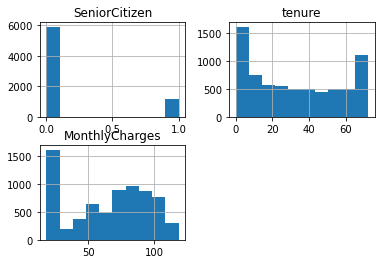

In [249]:
df.hist()

Outlier Check 

tenure                                    AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
PhoneService_No                         AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
PhoneService_Yes                        AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
MultipleLines_No                        AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
MultipleLines_No phone service          AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
MultipleLines_Yes                       AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
InternetService_DSL                     AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
InternetService_Fiber optic               AxesSubplot(0.125,0.677439;0.0945122x0.0920732)
InternetService_No                      AxesSubplot(0.238415,0.677439;0.0945122x0.0920...
OnlineSecurity_No                       AxesSubplot(0.351829,0.677439;0.0945122x0.0920...
OnlineSecurity_No internet service      AxesSubplot(0.465244,0.677439;0.0945122x0.0920...
OnlineSecu

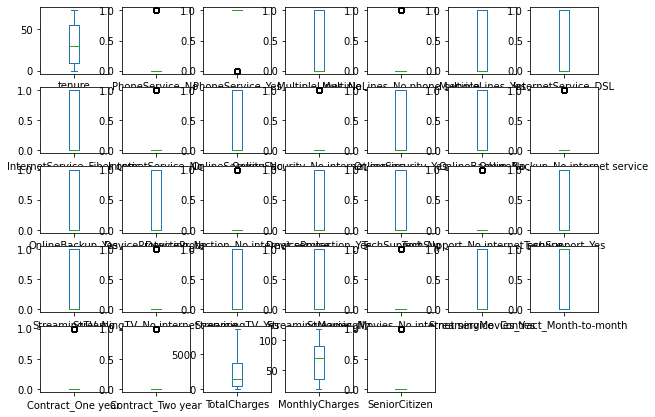

In [250]:
data.plot(kind='box',subplots=True,figsize=(10,10),layout=(7,7))

We can see that the data is not having any siginifact outliers to manage.

Scaling

In [251]:
y = data['Churn']
X = data.drop(columns=['Churn'])

In [252]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [253]:
data.replace(to_replace ="Yes",value ="1")
data.replace(to_replace ="No",value ="0")

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,1,Electronic check,No,No,1,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,1,Mailed check,1,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,1,Electronic check,1,No,No,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,1,0,0,1,1,0,0,0,...,0,1990.50,84.80,1,Mailed check,No,1,1,Male,0
7039,72,0,1,0,0,1,0,1,0,1,...,0,7362.90,103.20,1,Credit card (automatic),No,1,1,Female,0
7040,11,1,0,0,1,0,1,0,0,0,...,0,346.45,29.60,1,Electronic check,No,1,1,Female,0
7041,4,0,1,0,0,1,0,1,0,1,...,0,306.60,74.40,1,Mailed check,1,No,1,Male,1


,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,0,0,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,0,Mailed check,0,0,0,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,0,0,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,0,Bank transfer (automatic),0,0,0,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,0,0,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,1,0,0,1,1,0,0,0,...,0,1990.50,84.80,Yes,Mailed check,0,Yes,Yes,Male,0
7039,72,0,1,0,0,1,0,1,0,1,...,0,7362.90,103.20,Yes,Credit card (automatic),0,Yes,Yes,Female,0
7040,11,1,0,0,1,0,1,0,0,0,...,0,346.45,29.60,Yes,Electronic check,0,Yes,Yes,Female,0
7041,4,0,1,0,0,1,0,1,0,1,...,0,306.60,74.40,Yes,Mailed check,Yes,0,Yes,Male,1


In [254]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,Yes,Electronic check,No,No,Yes,Female,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,No,Mailed check,No,No,No,Male,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,Yes,Mailed check,Yes,No,No,Male,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,No,Bank transfer (automatic),No,No,No,Male,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,Yes,Electronic check,Yes,No,No,Female,0


In [255]:

data = data.replace(to_replace ="Female",value ="0")

In [256]:

data = data.replace(to_replace ="Male",value ="1")

In [257]:
data = data.replace(to_replace ="Yes",value ="1")

In [258]:

data = data.replace(to_replace ="No",value ="0")

In [259]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,1,Electronic check,0,0,1,0,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,0,Mailed check,0,0,0,1,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,1,Mailed check,1,0,0,1,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,0,Bank transfer (automatic),0,0,0,1,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,1,Electronic check,1,0,0,0,0


In [260]:

data = data.replace(to_replace ="Electronic check",value ="0")

In [261]:

data = data.replace(to_replace ="Mailed check",value ="1")

In [262]:

data = data.replace(to_replace ="Bank transfer (automatic)",value ="2")

In [263]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,TotalCharges,MonthlyCharges,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen
0,1,1,0,0,1,0,1,0,0,1,...,0,29.85,29.85,1,0,0,0,1,0,0
1,34,0,1,1,0,0,1,0,0,0,...,0,1889.50,56.95,0,1,0,0,0,1,0
2,2,0,1,1,0,0,1,0,0,0,...,0,108.15,53.85,1,1,1,0,0,1,0
3,45,1,0,0,1,0,1,0,0,0,...,0,1840.75,42.30,0,2,0,0,0,1,0
4,2,0,1,1,0,0,0,1,0,1,...,0,151.65,70.70,1,0,1,0,0,0,0


In [264]:
data_split = data[['TotalCharges','MonthlyCharges']]

In [265]:
# define min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled_split = scaler.fit_transform(data_split)
print(scaled_split)

[[0.0012751  0.11542289]
 [0.21586661 0.38507463]
 [0.01031041 0.35422886]
 ...
 [0.03780868 0.11293532]
 [0.03321025 0.55870647]
 [0.78764136 0.86965174]]


In [266]:
scaled_split[0]

array([0.0012751 , 0.11542289])

In [267]:
data = data.drop(['TotalCharges'], axis=1)

In [268]:
data = data.drop(['MonthlyCharges'], axis=1)

In [269]:
data[['TotalCharges','MonthlyCharges']] = scaled_split

In [270]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen,TotalCharges,MonthlyCharges
0,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0.001275,0.115423
1,34,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0.215867,0.385075
2,2,0,1,1,0,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0.010310,0.354229
3,45,1,0,0,1,0,1,0,0,0,...,0,0,2,0,0,0,1,0,0.210241,0.239303
4,2,0,1,1,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0.015330,0.521891


In [271]:
data.head()

,tenure,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,Contract_Two year,PaperlessBilling,PaymentMethod,Churn,Dependents,Partner,gender,SeniorCitizen,TotalCharges,MonthlyCharges
0,1,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0.001275,0.115423
1,34,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0.215867,0.385075
2,2,0,1,1,0,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0.010310,0.354229
3,45,1,0,0,1,0,1,0,0,0,...,0,0,2,0,0,0,1,0,0.210241,0.239303
4,2,0,1,1,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0.015330,0.521891


In [272]:
data['PaymentMethod'].unique()

array(['0', '1', '2', 'Credit card (automatic)'], dtype=object)

In [273]:
data = data.replace(to_replace ="Credit card (automatic)",value ="3")

In [274]:
from sklearn.model_selection import train_test_split
y = data['Churn']
x = data.drop(['Churn'],axis=1)

In [275]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0,stratify=y)
y.shape

(7043,)

In [276]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0,max_iter=300)  
classifier.fit(x_train, y_train)  

LogisticRegression(max_iter=300, random_state=0)

In [277]:
y_pred= classifier.predict(x_test)  

In [279]:
y.shape

(7043,)

In [280]:
y_pred.shape

(1409,)

In [281]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

C:\Users\Acabes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [282]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report

Accuracy: 0.8026969481902059


In [283]:
cr = classification_report(y_test,y_pred)

In [284]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



# RANDOM FOREST CLASSIFIER

In [285]:
from sklearn.ensemble import RandomForestClassifier

In [286]:
clf = RandomForestClassifier(n_estimators = 100)

In [287]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [288]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [289]:
y_pred = clf.predict(x_test)

In [290]:
from sklearn import metrics 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7842441447835344


# K - Nearest Neighbours

In [291]:
from sklearn.neighbors import KNeighborsClassifier

In [293]:
knn = KNeighborsClassifier(n_neighbors=4)
 
knn.fit(x_train, y_train)

print(knn.predict(x_test))

KNeighborsClassifier(n_neighbors=4)

['0' '0' '1' ... '0' '0' '1']


In [294]:
print(knn.score(x_test, y_test))

0.7771469127040455


# Checking if we can optimize the model

KNeighborsClassifier(n_neighbors=1)

[0.73882186 0.8684771  0.86315229 0.8372382  0.83581825 0.82836351
 0.82445864 0.82090877]


KNeighborsClassifier(n_neighbors=2)

[0.73882186 0.75869411 0.86315229 0.8372382  0.83581825 0.82836351
 0.82445864 0.82090877]


KNeighborsClassifier(n_neighbors=3)

[0.73882186 0.75869411 0.7523066  0.8372382  0.83581825 0.82836351
 0.82445864 0.82090877]


KNeighborsClassifier(n_neighbors=4)

[0.73882186 0.75869411 0.7523066  0.77714691 0.83581825 0.82836351
 0.82445864 0.82090877]


KNeighborsClassifier()

[0.73882186 0.75869411 0.7523066  0.77714691 0.76295245 0.82836351
 0.82445864 0.82090877]


KNeighborsClassifier(n_neighbors=6)

[0.73882186 0.75869411 0.7523066  0.77714691 0.76295245 0.7735983
 0.82445864 0.82090877]


KNeighborsClassifier(n_neighbors=7)

[0.73882186 0.75869411 0.7523066  0.77714691 0.76295245 0.7735983
 0.77004968 0.82090877]


KNeighborsClassifier(n_neighbors=8)

[0.73882186 0.75869411 0.7523066  0.77714691 0.76295245 0.7735983
 0.77004968 0.77217885]


Text(0.5, 0, 'n_neighbors')

Text(0, 0.5, 'Accuracy')

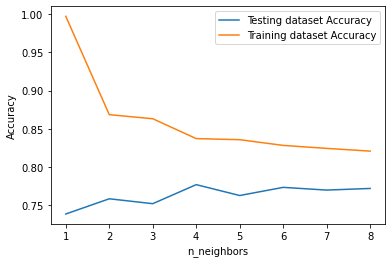

In [295]:
import matplotlib.pyplot as plt
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    print(test_accuracy)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Silhoutte Method

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'WCSS')

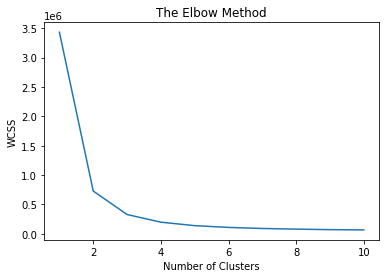

In [296]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [297]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(data)
print(cluster_labels)

[1 3 1 ... 1 1 0]


(-0.1, 1.0)

(0.0, 7073.0)

For n_clusters = 2 The average silhouette_score is : 0.6571701189154281


Text(-0.05, 1535.5, '0')

Text(-0.05, 5067.0, '1')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

InvalidIndexError: (slice(None, None, None), 0)

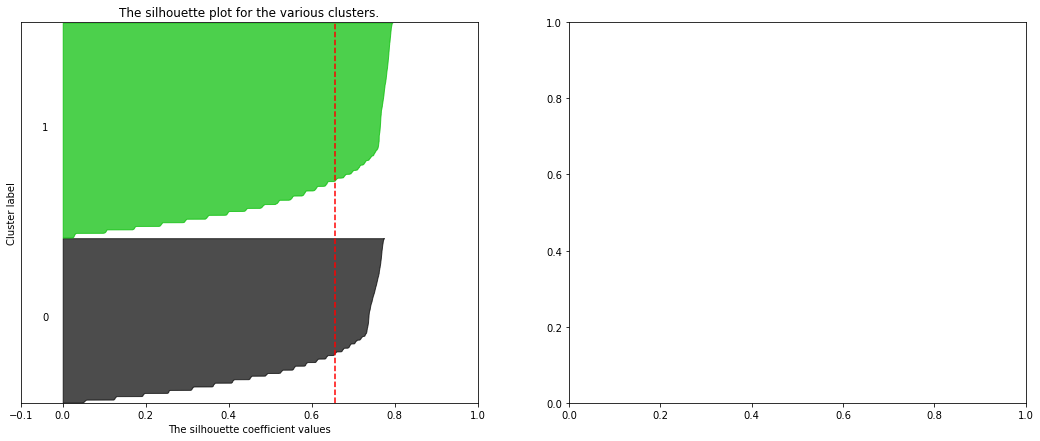

In [298]:

import matplotlib.cm as cm
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

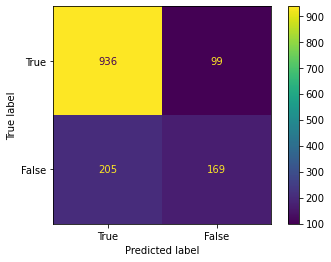

In [299]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

cm_display.plot()
plt.show()